<div class="alert alert-block alert-info alert">

# <span style=" color:red">WELCOME!
    
Welcome to "Bike Demand Visualization Project" which is the capstone project of Data Visualization Lessons . As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.

The aim of this project is to reveal the current patterns in the data by showing the historical data of London bike shares with visualization tools.

This will allow us to X-ray the data as part of the EDA process before setting up a machine learning model.</span>


<div class="alert alert-block alert-success ">

## <span style=" color:red">Determines 
    
Features
    
- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.
    
"weather_code" category description:

- 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
- 2 = scattered clouds / few clouds
- 3 = Broken clouds
- 4 = Cloudy
- 7 = Rain/ light Rain shower/ Light rain
- 10 = rain with thunderstorm
- 26 = snowfall
- 94 = Freezing Fog
    
Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc. Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.
    
# <span style=" color:red">Tasks
</span>





<div class="alert alert-warning alert-info">
<span style=" color:red">1. Import Libraries
</span>

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<div class="alert alert-warning alert-info">
<span style=" color:red">2. Read Dataset
</span>

In [2]:
df = pd.read_csv("store_sharing.csv")
df


,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


<div class="alert alert-warning alert-info">
<span style=" color:red">3. Check missing values and if there are any duplicate rows or not.
</span>

In [3]:
df.isna().sum()
# hangi sutunda kac tane nan deger old.nu gosteriyor bize, missing value olmadigini gorduk


timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [4]:
df.drop_duplicates()  # there is no duplicate rows

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


<div class="alert alert-warning alert-info">
<span style=" color:red">4. Plot the distribution of various discrete features on (Season, haliday, weekend and weathercode)
</span>


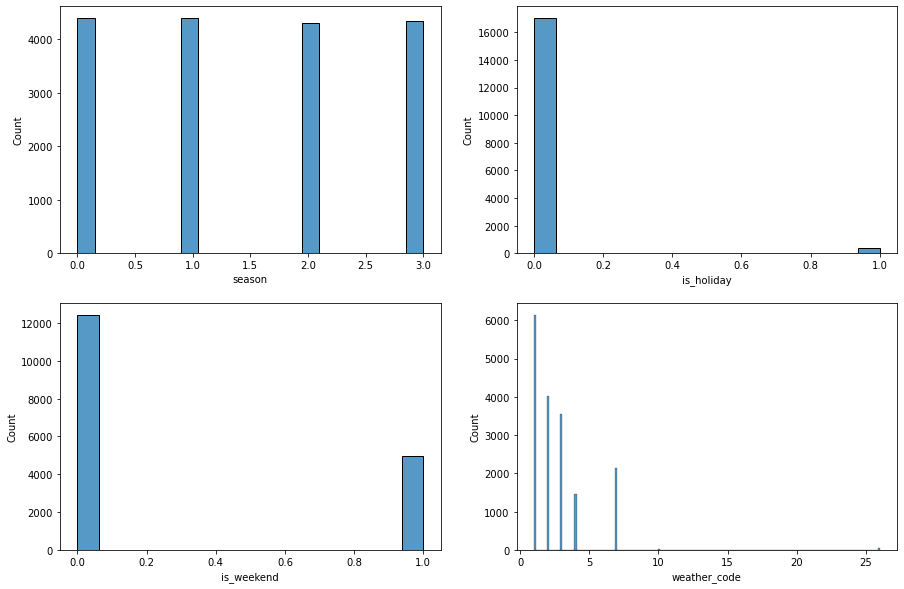

In [5]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

sns.histplot(data=df, x="season", ax=ax[0][0]);
sns.histplot(data=df, x="is_holiday", ax=ax[0][1]);
sns.histplot(data=df, x="is_weekend", ax=ax[1][0]);
sns.histplot(data=df, x="weather_code", ax=ax[1][1]);

# datanin icindeki total sayiyi gosteriyor

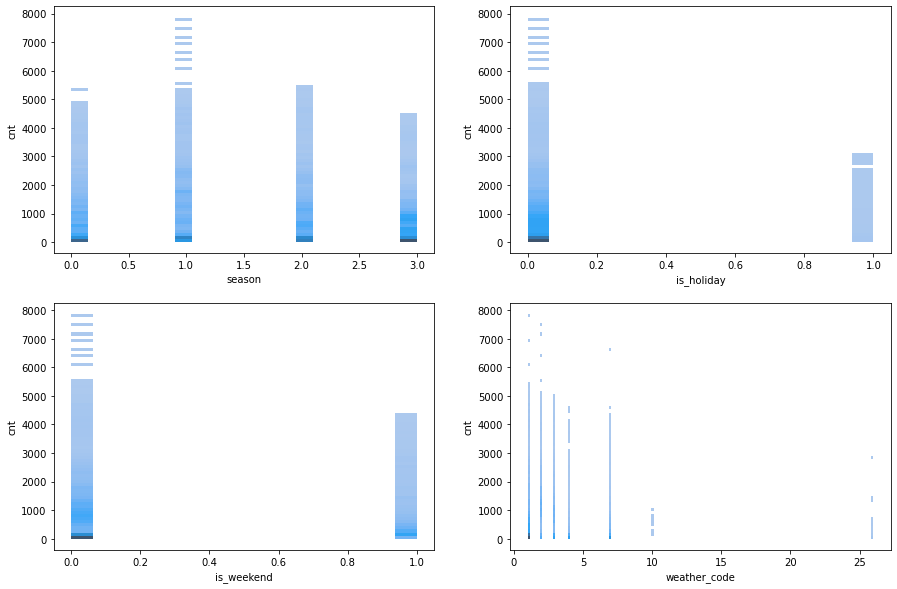

In [6]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

sns.histplot(data=df, x="season", y="cnt", ax=ax[0][0]);
sns.histplot(data=df, x="is_holiday", y="cnt" ,ax=ax[0][1]);
sns.histplot(data=df, x="is_weekend", y="cnt", ax=ax[1][0]);
sns.histplot(data=df, x="weather_code", y="cnt", ax=ax[1][1]);


# weather_code
sns.countplot(x='weather_code',data=df)

1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
2 = scattered clouds / few clouds
3 = Broken clouds
4 = Cloudy
7 = Rain/ light Rain shower/ Light rain
10 = rain with thunderstorm
26 = snowfall
94 = Freezing Fog

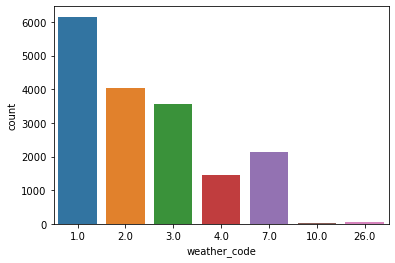

In [7]:
sns.countplot(x='weather_code',data=df);


<div class="alert alert-warning alert-info">
<span style=" color:red">5. Look at the data type of each variable, transform timestamp in type, and set it as index.
</span>

In [8]:
df.dtypes

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object

In [9]:
df["timestamp"] = df["timestamp"].astype("datetime64")


In [10]:
df.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object

In [11]:
df.set_index("timestamp", inplace=True)  # drop=False parametresi hem index hem de normal column olarak iki kere tutuyor columnu
df

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0


In [12]:
df.index

DatetimeIndex(['2015-01-04 00:00:00', '2015-01-04 01:00:00',
               '2015-01-04 02:00:00', '2015-01-04 03:00:00',
               '2015-01-04 04:00:00', '2015-01-04 05:00:00',
               '2015-01-04 06:00:00', '2015-01-04 07:00:00',
               '2015-01-04 08:00:00', '2015-01-04 09:00:00',
               ...
               '2017-01-03 14:00:00', '2017-01-03 15:00:00',
               '2017-01-03 16:00:00', '2017-01-03 17:00:00',
               '2017-01-03 18:00:00', '2017-01-03 19:00:00',
               '2017-01-03 20:00:00', '2017-01-03 21:00:00',
               '2017-01-03 22:00:00', '2017-01-03 23:00:00'],
              dtype='datetime64[ns]', name='timestamp', length=17414, freq=None)

In [13]:
# pd.to_datetime(df['timestamp'],format='%Y-%m-%d %H:%M')

df['year']=df.index.year 
df['month']=df.index.month 
df['day']=df.index.day
df['hour']=df.index.hour

df['dayofweek_num']=df.index.dayofweek
# df['dayofmonth_num']=df['timestamp'].dt.dayofmonth -- hata verdi

df


,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day,hour,dayofweek_num
timestamp,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,4,0,6
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,4,1,6
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,4,2,6
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,4,3,6
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,4,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0,2017,1,3,19,1
2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0,2017,1,3,20,1
2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0,2017,1,3,21,1


In [14]:
# df["Datetime"] = pd.to_datetime(df['timestamp'],format='%Y-%m-%d %H:%M')

<div class="alert alert-warning alert-info">
<span style=" color:red">6. Make feature engineering. Extract new columns (day of the week, day of the month, hour, month, season, year etc.)
</span>

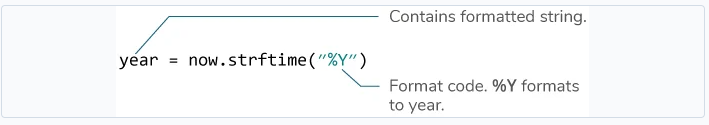

<div class="alert alert-warning alert-info">
<span style=" color:red">7. Visualize the correlation with a heatmap
</span>

In [ ]:
# season_mapping = {0: "spring", 1: "summer", 2: "fall", 3: "winter"}
# df["season"] = df["season"].map(season_mapping) 

# bunu yukaridaki grafikte rakamlar yerine mevsim isimleri gorunsun diye yaptik


In [15]:
df.corr()  #korelasyon komutu


,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day,hour,dayofweek_num
cnt,1.000000,0.388798,0.369035,-0.462901,0.116295,-0.166633,-0.051698,-0.096499,-0.116180,0.010046,0.063757,-0.017887,0.324423,-0.068688
t1,0.388798,1.000000,0.988344,-0.447781,0.145471,-0.097114,-0.042233,-0.005342,-0.285851,-0.037959,0.332712,0.005072,0.168708,-0.002317
t2,0.369035,0.988344,1.000000,-0.403495,0.088409,-0.098385,-0.040051,-0.008510,-0.285900,-0.044972,0.368366,0.006791,0.153956,-0.006824
hum,-0.462901,-0.447781,-0.403495,1.000000,-0.287789,0.334750,0.032068,0.028098,0.290381,0.072443,0.113149,-0.020868,-0.295653,0.011556
wind_speed,0.116295,0.145471,0.088409,-0.287789,1.000000,0.124803,-0.002606,0.011479,0.010305,-0.094739,-0.086383,0.002040,0.141792,0.001708
weather_code,-0.166633,-0.097114,-0.098385,0.334750,0.124803,1.000000,0.012939,0.042362,0.098976,-0.009234,-0.033253,0.001904,-0.041786,0.020619
is_holiday,-0.051698,-0.042233,-0.040051,0.032068,-0.002606,0.012939,1.000000,-0.094898,-0.032488,0.034631,-0.011511,0.042657,-0.000288,-0.144628
is_weekend,-0.096499,-0.005342,-0.008510,0.028098,0.011479,0.042362,-0.094898,1.000000,0.001067,0.003049,-0.005406,0.005721,0.001803,0.791975
season,-0.116180,-0.285851,-0.285900,0.290381,0.010305,0.098976,-0.032488,0.001067,1.000000,0.024400,0.203249,-0.006460,0.000006,0.002356
year,0.010046,-0.037959,-0.044972,0.072443,-0.094739,-0.009234,0.034631,0.003049,0.024400,1.000000,-0.026547,-0.021935,0.000542,-0.002876


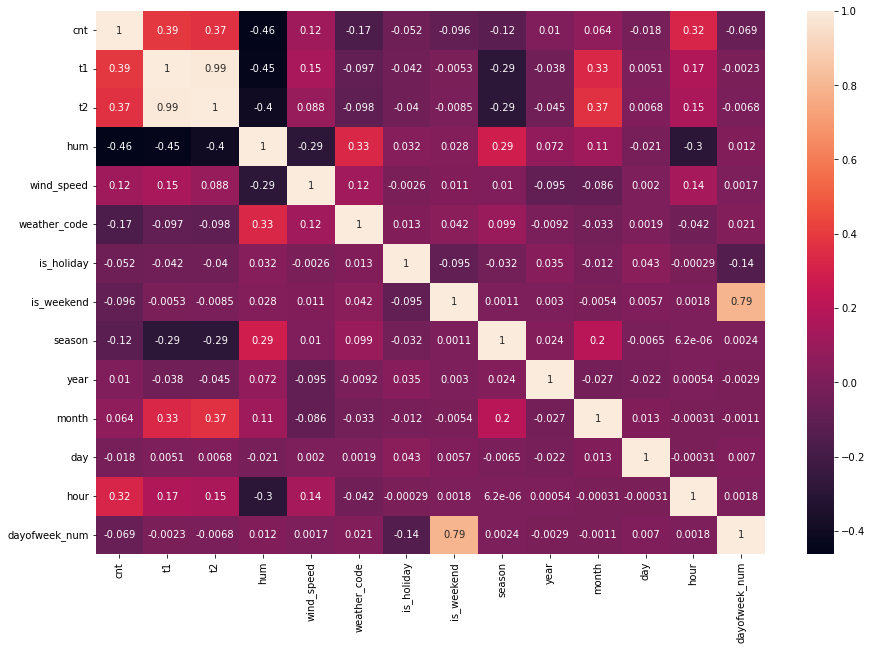

In [18]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True);
# sns.heatmap(df.corr()[df.corr() > 0.2], annot=True);  # korelasyonu sadece 0.2 den buyuk olanlari goster demek istedik burada da 

<div class="alert alert-warning alert-info">
<span style=" color:red">8. Visualize the correlation of the target variable and the other features with barplot
</span>

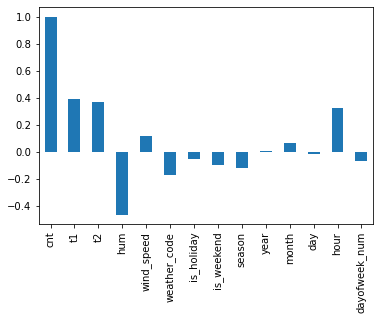

In [21]:
# hedef degiskenimiz cnt 
df.corr()["cnt"].plot(kind="bar");


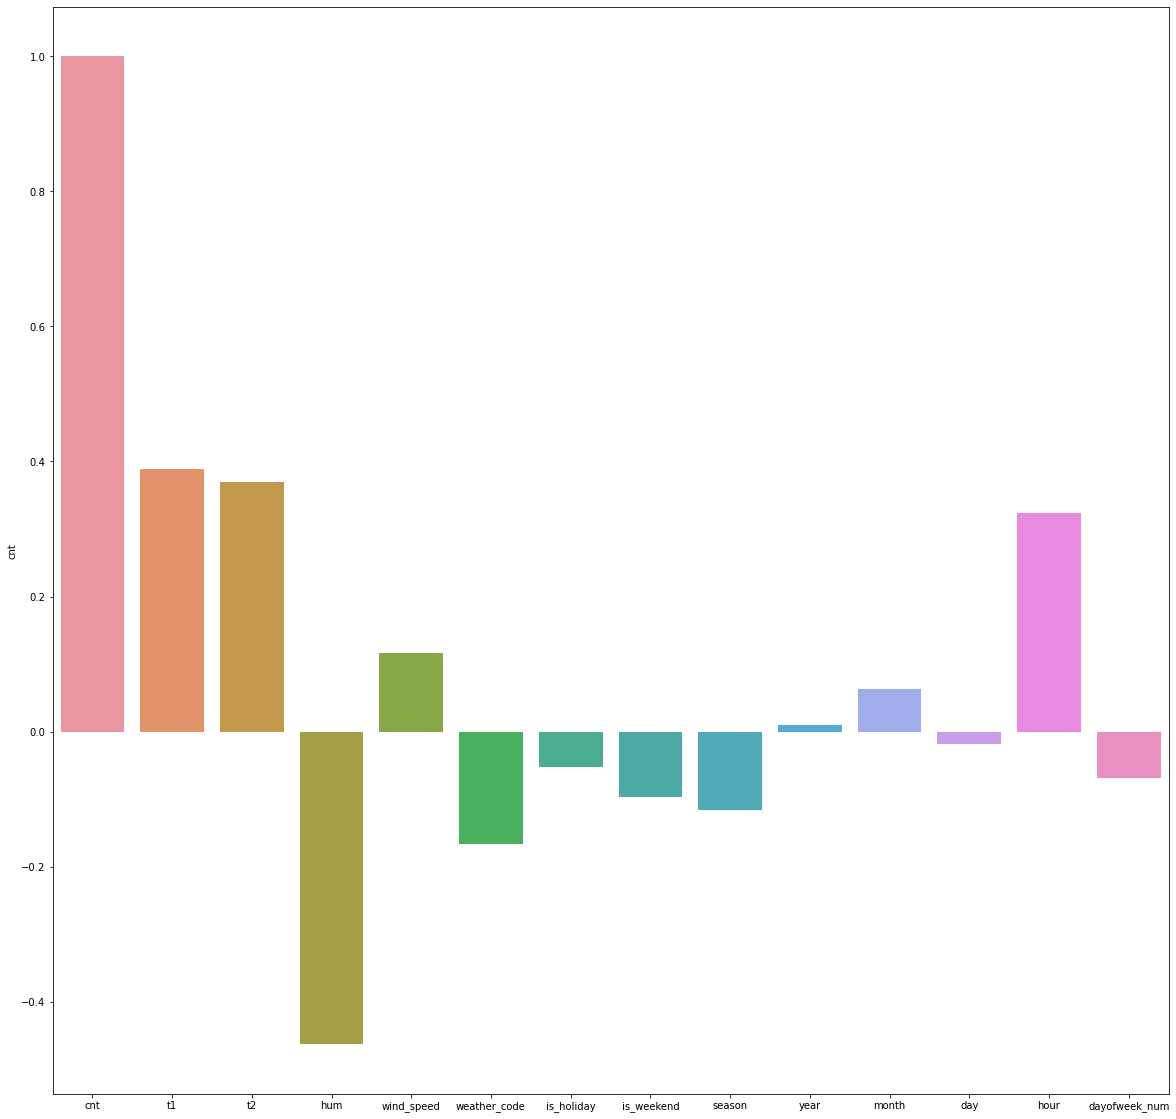

In [25]:
plt.figure(figsize=(20, 20))
sns.barplot(x=df.corr()["cnt"].index, y=df.corr()["cnt"]);


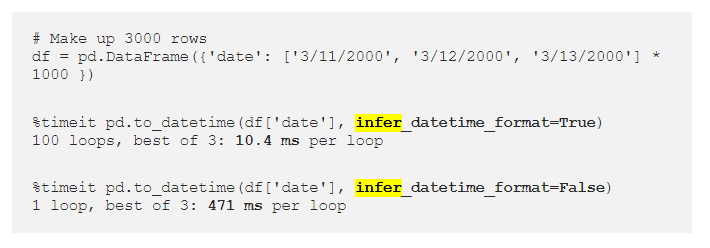

<div class="alert alert-warning alert-info">
<span style=" color:red">9. Plot bike shares over time use lineplot.
</span>

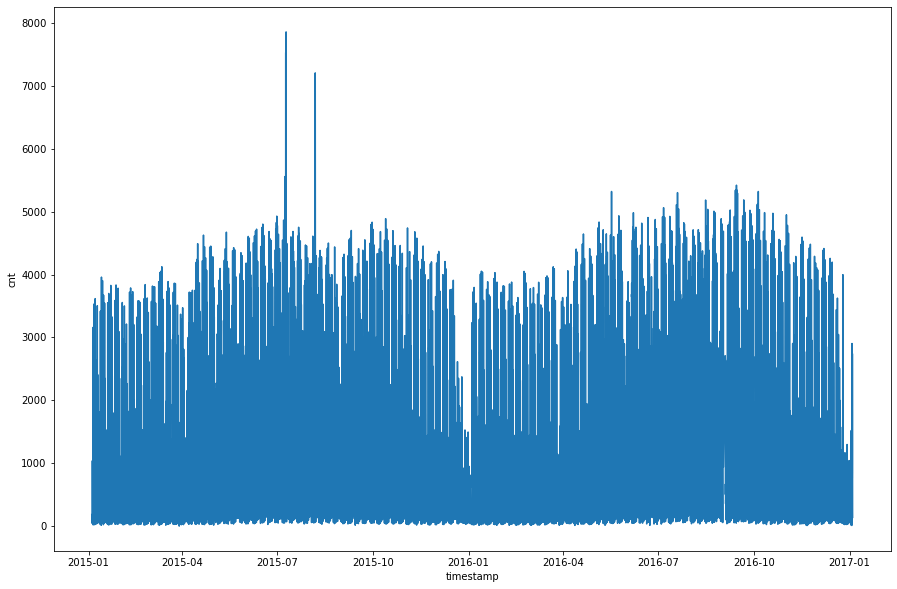

In [29]:
plt.figure(figsize=(15, 10))
sns.lineplot(x=df.index, y=df["cnt"]);


<div class="alert alert-warning alert-info">
<span style=" color:red">10. Plot bike shares by months and year_of_month (use lineplot, pointplot, barplot).
</span>

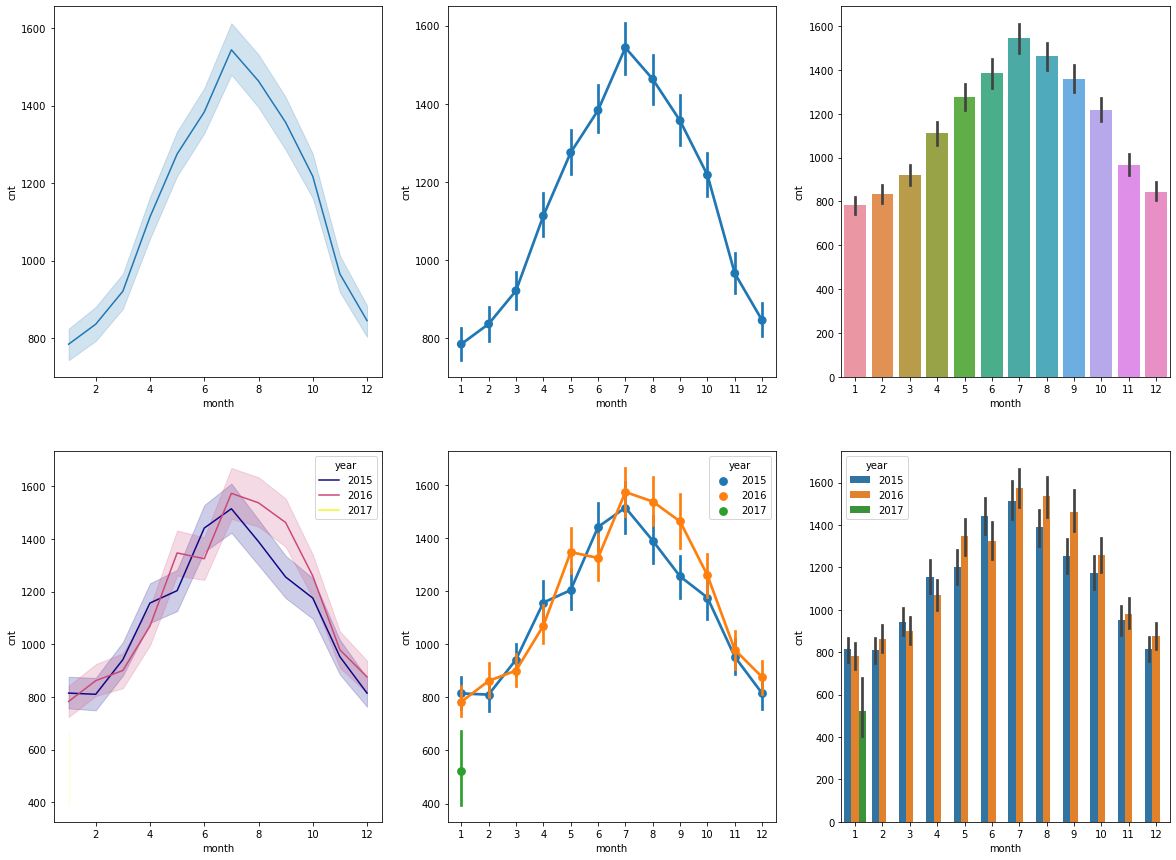

In [40]:
fig, ax = plt.subplots(2, 3, figsize=(20, 15))  # bos cerceve olusturdum buraya
sns.lineplot(x=df["month"], y=df["cnt"], ax=ax[0, 0]);
sns.pointplot(x=df["month"], y=df["cnt"], ax=ax[0, 1]);
sns.barplot(x=df["month"], y=df["cnt"], ax=ax[0, 2]);
sns.lineplot(x=df["month"], y=df["cnt"], hue=df["year"], palette="plasma", ax=ax[1, 0]);
sns.pointplot(x=df["month"], y=df["cnt"], hue=df["year"], ax=ax[1, 1]);
sns.barplot(x=df["month"], y=df["cnt"], hue=df["year"], ax=ax[1, 2]);

In [41]:
df

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day,hour,dayofweek_num
timestamp,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,4,0,6
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,4,1,6
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,4,2,6
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,4,3,6
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,4,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0,2017,1,3,19,1
2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0,2017,1,3,20,1
2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0,2017,1,3,21,1


<div class="alert alert-warning alert-info">
<span style=" color:red">11. Plot bike shares by hours on (holidays, weekend, season).
</span>

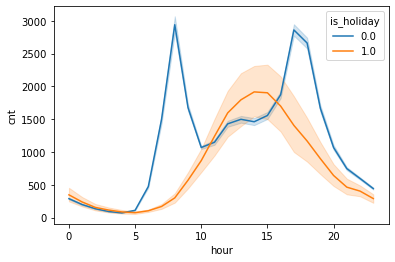

In [47]:

sns.lineplot(x=df["hour"], y=df["cnt"], hue=df["is_holiday"]);


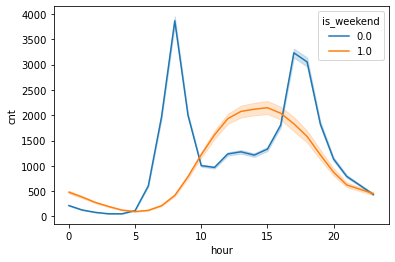

In [46]:

sns.lineplot(x=df["hour"], y=df["cnt"], hue=df["is_weekend"]);

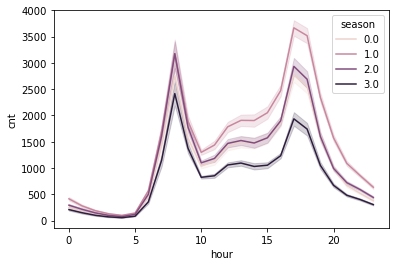

In [45]:

sns.lineplot(x=df["hour"], y=df["cnt"], hue=df["season"]);

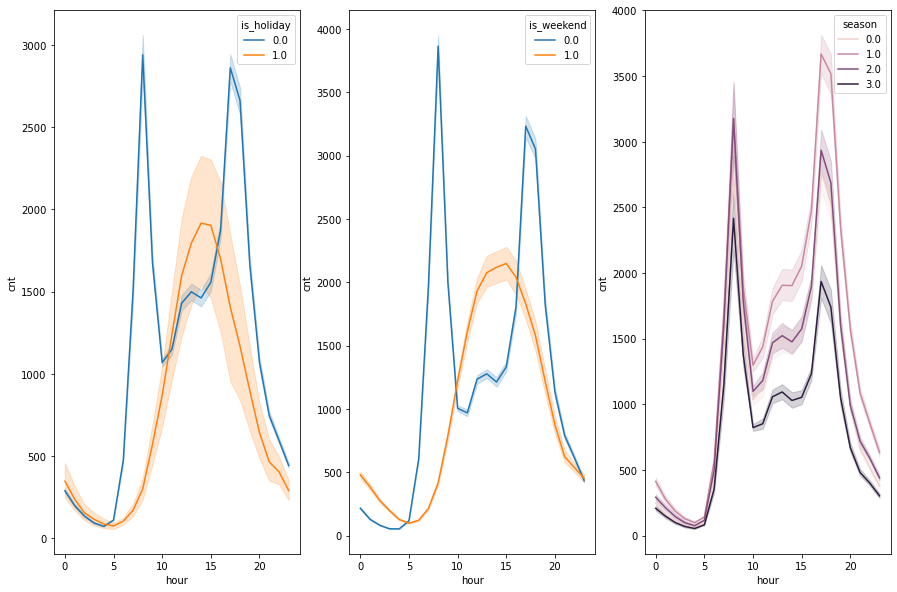

In [49]:
fig, ax = plt.subplots(1, 3, figsize=(15, 10))
sns.lineplot(x=df["hour"], y=df["cnt"], hue=df["is_holiday"], ax=ax[0]);  # tek boyutlu old icin yani tek satirda belirttigimiz icin direk tek boyutlu ax veriyoruz
sns.lineplot(x=df["hour"], y=df["cnt"], hue=df["is_weekend"], ax=ax[1]);
sns.lineplot(x=df["hour"], y=df["cnt"], hue=df["season"], ax=ax[2]);


<div class="alert alert-warning alert-info">
<span style=" color:red"> 12. Plot bike shares by day of week.

- You may want to see whether it is a holiday or not
</span>

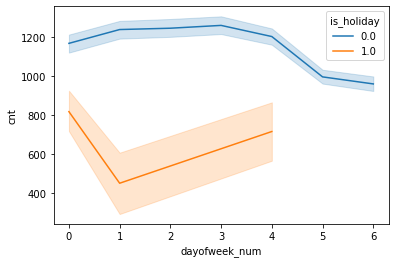

In [51]:
sns.lineplot(x=df["dayofweek_num"], y=df["cnt"], hue=df["is_holiday"]);


<div class="alert alert-warning alert-info">
<span style=" color:red"> 13. Plot bike shares by day of month
</span>

In [52]:
df["day_of_month"] = df.index.strftime("%d")
df


,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day,hour,dayofweek_num,day_of_month
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,4,0,6,04
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,4,1,6,04
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,4,2,6,04
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,4,3,6,04
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,4,4,6,04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0,2017,1,3,19,1,03
2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0,2017,1,3,20,1,03
2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0,2017,1,3,21,1,03


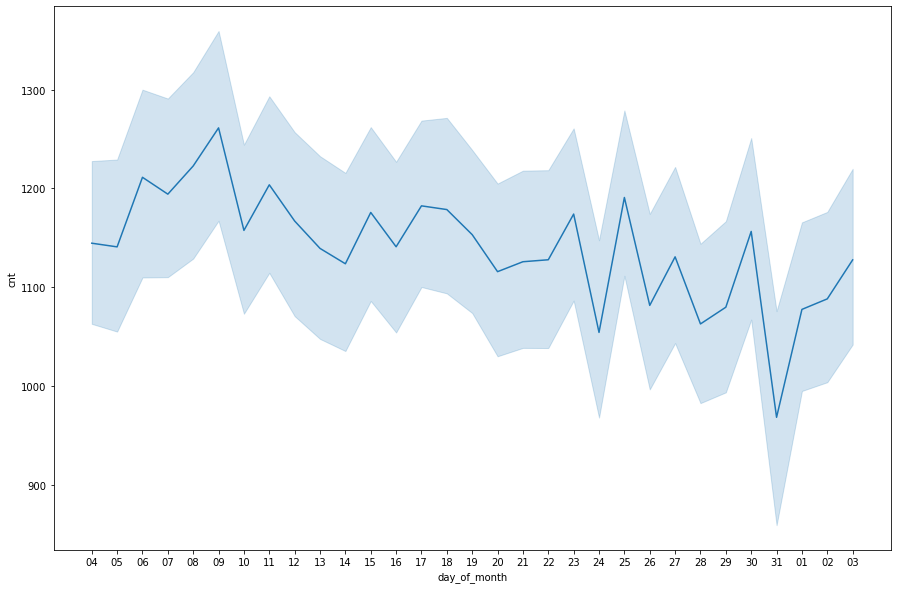

In [54]:
plt.figure(figsize=(15, 10))
sns.lineplot(x=df["day_of_month"], y=df["cnt"]);


<div class="alert alert-warning alert-info">
<span style=" color:red"> 14. Plot bike shares by year

- Plot bike shares on holidays by seasons
</span>

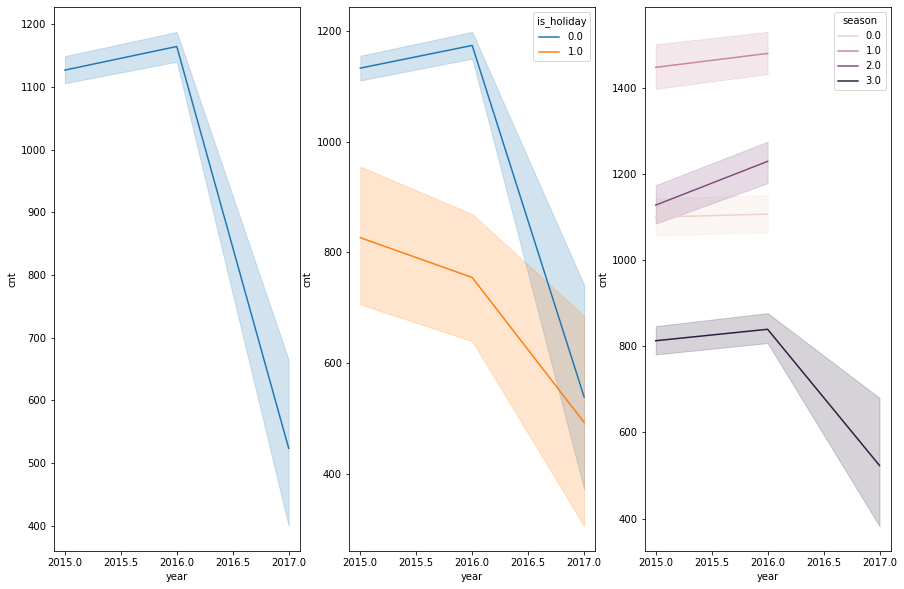

In [62]:
fig, ax = plt.subplots(1, 3, figsize=(15, 10))
sns.lineplot(x=df["year"], y=df["cnt"], ax=ax[0])
sns.lineplot(x=df["year"], y=df["cnt"], hue=df["is_holiday"], ax=ax[1])
sns.lineplot(x=df["year"], y=df["cnt"], hue=df["season"], ax=ax[2]);


<div class="alert alert-warning alert-info">
<span style=" color:red">15. Visualize the distribution of bike shares by weekday/weekend with piechart and barplot
</span>

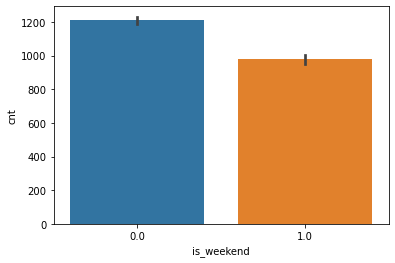

In [63]:
sns.barplot(x=df["is_weekend"], y=df["cnt"]);


In [ ]:
# piechart i sns ile cizemiyoruz, seaborn da yok, matplotlib de cizmemiz gerekiyor

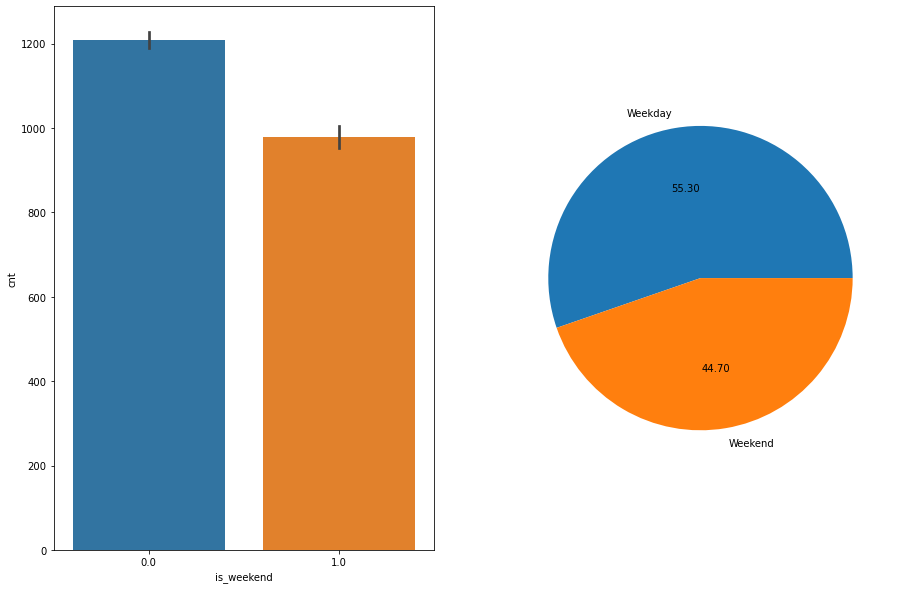

In [65]:
fig, ax = plt.subplots(1, 2, figsize=(15, 10))
sns.barplot(x=df["is_weekend"], y=df["cnt"], ax=ax[0]);
plt.pie(x=df.groupby("is_weekend").cnt.mean(), labels=["Weekday", "Weekend"], autopct="%.2f");


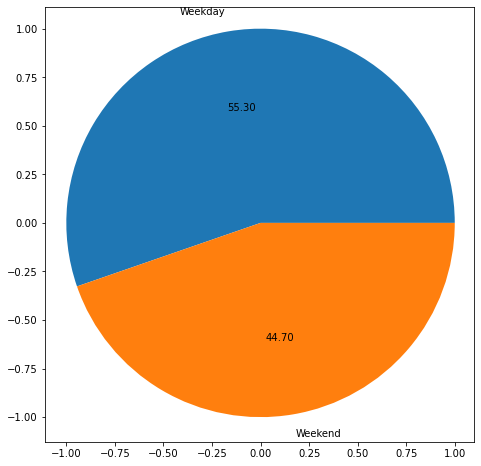

In [67]:
plt.figure(figsize=(15, 8))
plt.pie(x=df.groupby("is_weekend").cnt.mean(), labels=["Weekday", "Weekend"], autopct="%.2f", frame=True);
# weekday ile weekend yazilari burada gorunmuyordu background black old icin, o sorunu yukarida fig, ax ayari vererek cozduk

<div class="alert alert-warning alert-info">
<span style=" color:red">16. Plot the distribution of weather code by seasons
</span>

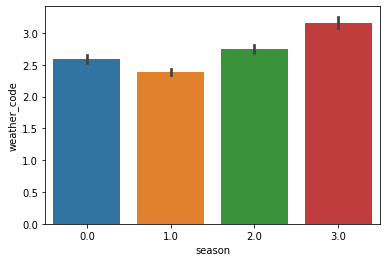

In [69]:
sns.barplot(x=df["season"], y=df["weather_code"]);

<div class="alert alert-info alert-info ">

# <span style=" color:red">Conclusions
    

    

</span>

- There was totally clear data. No null and no duplicate rows.
- Too many days weather is clear. Freezing Fog never happened. Snowfall sometimes happened. Rain with thunderstorms happened the least.
- As we expect the spring and summer have too many clear days. In the fall and winter have got more Scattered and Broken clouds.
- Bike shares have positive relations with Temperature, Feeling Temperature, Hour and Wind Speed.
- Bike shares have negative relations with humidity, weather status and season.
- As a normally too strong positive correlation between temperature and feeling temperature.
- As a normally positive correlation between Temperature/Feeling Temperature and months.
- As a normally , positive correlation between the hum and seasons. 
- Humidity and weather status have positive realations.
- Humidity and wind speed have negative realations.
- Bike shares is declining but peaked in the summer of 2015
- As a normally , In summers more bike shares happens.
- In all seasons. Early 8-9a.m and 17-18p.m too many bikes shares.
- In weekdays also same eary 8-9a.m and 17.18p.m.
- But in the weekends too many bikes shares around at 14-15p.m and have normal distribution.
- On a holiday, less bike is shared than normal.
- In a normal day(not holiday) summer have too many bike shares. Winter have lest.
- During the holidays, not happened any bike shares in Fall. (This is strange) Winter still lest. Summer and spring almost the same bike shares.
- Seasons have normal weather status. Hard to beautiful ==> Winter>Fall>Spring>Summer

- That's all.

<div class="alert alert-block alert-info">
<span style=" color:red">Thanks for Attending!..
    

</span>